# Import libraries

In [1]:
import numpy as np 
from matplotlib.collections import LineCollection
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.patches
import scipy.signal as signal

data = np.load("../../data/processed_data/extended_data_figure_10/stability/stability_T176_2018_05_03.npz")
z_pc = data['z_pc']
externalinputs=data['externalinputs']

# Generate plot

/var/folders/jn/x2x9w_8n77b_g5cnyyfbzc9w0000gp/T/ipykernel_19978/1772619792.py:108: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('gray')


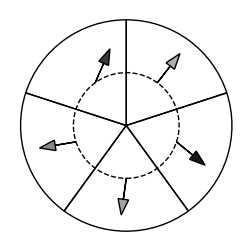

In [2]:
# Smooth spikes with 20 ms std gaussian
kern_sd_ms = 20
kern_sd = int(round(kern_sd_ms / 10))
window = signal.windows.gaussian(kern_sd * 6, kern_sd, sym=True)
window /= np.sum(window)
filt = lambda x: np.convolve(x, window, 'same')

origin = np.nanmean(np.nanmean(z_pc, axis=0), axis=0)
auto_modelfree = (np.zeros((5, z_pc.shape[0], 100)) > 0)
temp = (externalinputs[:,:,1] > 0).astype(float) - (externalinputs[:,:,0] > 0).astype(float)

radius = 0.2
clicks_smoothed = np.apply_along_axis(filt, 1, externalinputs)/0.01
startangle = (np.pi/2 - 2*np.pi/5)

for trial in range(z_pc.shape[0]):
    z = z_pc[trial, :, :] - z_pc[trial, 0, :]
    radii = np.linalg.norm(z, axis=1)
    thetas = np.arctan2(z[:, 1], z[:, 0])
    z_ij = (startangle <= thetas) * \
        (thetas < (startangle + 2*np.pi/5)) * \
        (radii <= radius)
    if np.sum(temp[trial, z_ij]) == 0:
        auto_modelfree[0, trial, z_ij>0] = ~np.any(clicks_smoothed[trial, z_ij>0, :], axis=1)
    else:
        auto_modelfree[0, trial, z_ij>0] = 0

for trial in range(z_pc.shape[0]):
    z = z_pc[trial, :, :] - z_pc[trial, 0, :]
    radii = np.linalg.norm(z, axis=1)
    thetas = np.arctan2(z[:, 1], z[:, 0])
    z_ij = ((startangle + 2*np.pi/5) <= thetas) * \
        (thetas < (startangle + 2*2*np.pi/5)) * \
        (radii <= radius)
    if np.sum(temp[trial, z_ij]) == 0:
        auto_modelfree[1, trial, z_ij>0] = ~np.any(clicks_smoothed[trial, z_ij>0, :], axis=1)
    else:
        auto_modelfree[1, trial, z_ij>0] = 0
        
for trial in range(z_pc.shape[0]):
    z = z_pc[trial, :, :] - z_pc[trial, 0, :]
    radii = np.linalg.norm(z, axis=1)
    thetas = np.arctan2(z[:, 1], z[:, 0])
    z_ij = ( ((startangle + 2*2*np.pi/5) <= thetas) + (thetas < -(2*2*np.pi/5 - startangle)) ) * \
        (radii <= radius)
    if np.sum(temp[trial, z_ij]) == 0:
        auto_modelfree[2, trial, z_ij>0] = ~np.any(clicks_smoothed[trial, z_ij>0, :], axis=1)
    else:
        auto_modelfree[2, trial, z_ij>0] = 0

for trial in range(z_pc.shape[0]):
    z = z_pc[trial, :, :] - z_pc[trial, 0, :]
    radii = np.linalg.norm(z, axis=1)
    thetas = np.arctan2(z[:, 1], z[:, 0])
    z_ij = (-(2*2*np.pi/5 - startangle) <= thetas) * (thetas < -(2*np.pi/5 - startangle)) * \
        (radii <= radius)
    if np.sum(temp[trial, z_ij]) == 0:
        auto_modelfree[3, trial, z_ij>0] = ~np.any(clicks_smoothed[trial, z_ij>0, :], axis=1)
    else:
        auto_modelfree[3, trial, z_ij>0] = 0        

for trial in range(z_pc.shape[0]):
    z = z_pc[trial, :, :] - z_pc[trial, 0, :]
    radii = np.linalg.norm(z, axis=1)
    thetas = np.arctan2(z[:, 1], z[:, 0])
    z_ij = (-(2*np.pi/5 - startangle) <= thetas) * (thetas < startangle) * \
        (radii <= radius)
    if np.sum(temp[trial, z_ij]) == 0:
        auto_modelfree[4, trial, z_ij>0] = ~np.any(clicks_smoothed[trial, z_ij>0, :], axis=1)
    else:
        auto_modelfree[4, trial, z_ij>0] = 0          
        
modelfree_u = np.zeros(5)
modelfree_v = np.zeros(5)

z_pc_dot = (z_pc[:, 1:, :] - z_pc[:, :99, :])/0.01
z_pc_dot = np.hstack((np.zeros((z_pc_dot.shape[0], 1, 2)), z_pc_dot))
z_pc_dot_ = np.reshape(z_pc_dot, (-1, 2))
for i in range(5):
    uv = np.nanmean(z_pc_dot_[auto_modelfree[i, :, :].flatten(), :], axis=0)
    modelfree_u[i] = uv[0]
    modelfree_v[i] = uv[1]

sizes = [20, 20, 20, 20, 20]

fig1, ax1 = plt.subplots()
fig1.set_size_inches(3,3)
wedges1, texts = ax1.pie(
    sizes, 
    radius = 1, 
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}, 
    startangle=(np.pi/2 - 2*np.pi/5)*180/np.pi
)
circle = matplotlib.patches.Circle(
    wedges1[0].center, 
    0.5, 
    fill=False, 
    edgecolor="k", 
    linewidth=1, 
    linestyle='--'
)

# add the circle to the axes
ax1.add_patch(circle)
ax1.axis('equal')

norm = colors.LogNorm(vmin=0.1, vmax=1)
cmap = matplotlib.cm.get_cmap('gray')

# Draw the arrow
for jjj in range(5):
    uv = np.array([modelfree_u[jjj], modelfree_v[jjj]])
    uv1 = 0.2 * uv / np.linalg.norm(uv)
    xposition = 0.5*np.cos(startangle + 2*(jjj)*np.pi/5 + np.pi/5)
    yposition = 0.5*np.sin(startangle + 2*(jjj)*np.pi/5 + np.pi/5)
    ax1.arrow(xposition, yposition, uv1[0], uv1[1], head_width=0.1, head_length=0.15, 
                fc=cmap(norm(0.1*np.linalg.norm(uv))), ec='k')

# Set facecolor to 'none' for no fill color
for wedge1 in wedges1:
    wedge1.set_facecolor('none')